In [1]:
# Load the Data with the Json body where text is in tag "aes_sch_body_t"

In [1]:
path = r'/home/ec2-user/SageMaker/Data/Bank/Banking'

In [2]:
!python -m pip install --upgrade pip
import os
import sys
import re
import json

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (20.1.1)


In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
""" Read the Json data and remove all the special Characters
    Save the data in a list_of_doc <list>
"""

def readData(path):
    list_of_doc=[]
    #count = 0
    for i in os.walk(path):
        
        #print(i)
        for j in i[2]:
            
            file = open(path+'/'+j, encoding="utf8")
            #print(file)
            data=json.loads(file.read())
            if 'aes_sch_body_t' in data:
                text = data['aes_sch_body_t']
                ## Preprocessing of text::
                text = ''.join([i for i in text if not i.isdigit()])
                text = re.sub("[“”/\‹!›@#$+%*:()'© •]", ' ', text)
                list_of_doc.append(text)
    return list_of_doc

list_of_doc = readData(path)
len(list_of_doc)

248

In [5]:
"""Read the Corpus from list_of_doc and parse all the sentences using NTLK Sentence parser"""


list_of_sentence = [sent_tokenize(each) for each in list_of_doc]
print(len(list_of_sentence))
corpus = []
for each in list_of_sentence:
    corpus.extend(each)
len(corpus)

248


9591

# Install TensorFlow & Sentence-transform

In [6]:
!pip install "tensorflow_hub>=0.6.0"
!pip install "tensorflow>=2.0.0"
!pip install sentence-transformers

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [8]:
from sentence_transformers import SentenceTransformer

In [9]:
# Load the Predefined BERT
embedder = SentenceTransformer('bert-base-nli-mean-tokens')

In [10]:
# Encode the Corpus with BERT 
corpus_embeddings = embedder.encode(corpus)

In [ ]:
# Save the Encoding
import pickle
with open('BERT_Banking_Sentence_Embedding.pkl', 'wb') as f:
    pickle.dump(corpus_embeddings, f)

    Encoder will Vectorize the Corpus
    Using KMeans, we can form the Clusters of the corpus
    This will segregate the similar sentences of the corpus into one cluster

In [2]:
# Choice of Clusters is defined by User, the type of Corpus but essentially by drawing the Scree Plot

In [24]:
## Find Ideal Number of Clusters
from sklearn.cluster import KMeans
# Perform kmean clustering
num_clusters = 10
wcss = []
for i in range(1,num_clusters):
    clustering_model = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
    clustering_model.fit(corpus_embeddings)
    wcss.append(clustering_model.inertia_)

In [25]:
import matplotlib.pyplot as plt

#  Draw the Scree Plot

Text(0, 0.5, 'WCSS')

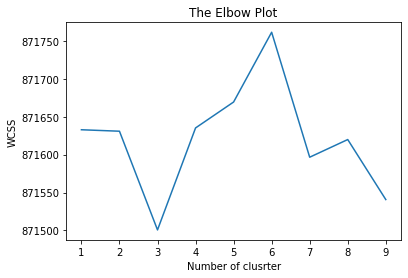

In [26]:
plt.plot(range(1,num_clusters), wcss)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusrter')
plt.ylabel('WCSS')

In [ ]:
# Chose Number of Cluster as 2

In [27]:
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

# Apply Topic Modeling LDA on the Cluster Extracted via BERT

In [3]:
## Intall LDA Dependencies

In [28]:
!pip install gensim
!pip install pyLDAvis
!pip install spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 24.2 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 66.8 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110317 sha256=c92c9c38dcdf12b775527a01559bad720a9e1abc00a716bf2906bf48acc9565d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/a4/9b/d5/85705a7ab783cd6f7bd718f01d3b1396272f30044e3c36401a
Successfully built smart-open
     |████████████████████████████████| 1.6 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 548 kB 69.0 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=23e56ec1d861ddf198db25f8dd9a6c7098e81ce6b2fdb321721e2477a62f7cce
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/de/11/0a038be70c2c212ce45fa0f4f9da165bb5dd87de1288394dc3
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=7afb41755da2170f752c92b05dd2e85642bbd22e2ec57f3106aa60fa75f

     |████████████████████████████████| 185 kB 62.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 66.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 51.8 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 58.8 MB/s eta 0:00:01
  Created wheel for wasabi: filename=wasabi-0.7.1-py3-none-any.whl size=20834 sha256=34d0881cd45dd795909e27629aa70b3cdd1256725ff4a2471f51460a598014d8
  Stored in directory: /home/ec2-user/.cache/pip/wheels/81/48/90/cf81833b3dfce6eaf7eab4bd5fdc0e75dbca4418b263f444b8
Successfully built wasabi
     |████████████████████████████████| 12.0 MB 39.4 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=78efa4fe0e645e438a25dc2e416d1ee40d1897d4f6ae3f615c0fd52452908fc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-6qac8wt1/wheels/10/6f/a6/ddd8204ceecdedddea923f8514e13afb0c1f0f556d2c9c3da0
Successfully built en-core-web-sm
✔ Download and installation succe

In [29]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import ldamodel


# Plotting tools
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline


## Optional
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()



In [30]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# LDA Pipeline

    Clean the corpus
    Get Tokens from Sentences
    Remove Tokens which are Stop Words 
    Use Tokens to form Bigrams and Trigrams to identify phrases
    
    We can use Lemmitization before Bigrams depending upon Corpus, for this Use case, it give bad result hence 
    its been Removed

In [32]:
# Cleaning of Corpus
def preprocess(CORPUS):
    data = []
    # Convert to list
    #data = dataset.Description.values.tolist()
    # Remove Emails
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in CORPUS]
    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]
    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]
    # Remove https
    data = [re.sub(r"http\S+", "", sent) for sent in data]
    return data

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]



In [42]:
CORPUS = clustered_sentences[0]
topics = 2

In [43]:
data = preprocess(CORPUS)
data_words = list(sent_to_words(data))
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=15) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=15)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Form Tri-grams
data_words_ngrams = make_trigrams(data_words)

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words_ngrams)

# Create Dictionary
# Corpora is a class of gensim
corpus_value = data_words_nostops
id2word = corpora.Dictionary(corpus_value)

# Create Corpus
texts = corpus_value

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus_value, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.282005749541776

Coherence Score:  0.44207698258856604


In [46]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.171969  0.0       1        1  72.126480
1     -0.171969  0.0       2        1  27.873512, topic_info=              Term         Freq        Total Category  logprob  loglift
15        services  2020.000000  2020.000000  Default  30.0000  30.0000
3            cloud   545.000000   545.000000  Default  29.0000  29.0000
223   confidential   663.000000   663.000000  Default  28.0000  28.0000
280        banking   747.000000   747.000000  Default  27.0000  27.0000
614         global   282.000000   282.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
333       security   161.988358   340.815491   Topic2  -5.5690   0.5337
1         business   233.343765  1192.054565   Topic2  -5.2041  -0.3534
1695       company   140.214584   245.968414   Topic2  -5.7134   0.7155
12        platform   168.259460   699.264709   Topic2  -5.5311  -0.1470
314       industry   138.770844   398.736908   Topic2  -5.7237   0.2220

[151 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
210       1  0.941338     access
210       2  0.058589     access
268       1  0.015811   advisory
268       2  0.980296   advisory
2232      1  0.009383         ag
...     ...       ...        ...
728       2  0.005398      using
221       1  0.979237      value
221       2  0.022685      value
415       1  0.019688  workplace
415       2  0.984415  workplace

[221 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [47]:
KeyWords = lda_model.show_topics(num_words= 15, formatted=False)
Dictionary_LDA_gensim = {}
for k in KeyWords:
    Dictionary_LDA_gensim.update({k[0]: k[1]})
    #print(k)
## Clean Dictionary
clean_lda_gensim = {}
#mallet_dictionary = {}
for key,value in Dictionary_LDA_gensim.items():
    list_ = []
    for e2 in value:
        list_.append(e2[0])
    clean_lda_gensim.update({key:list_})    

df = pd.DataFrame.from_dict(clean_lda_gensim)
df.columns = ['Topic1', 'Topic2']
df

,Topic1,Topic2
0,dxc,services
1,data,cloud
2,services,dxc
3,new,confidential
4,business,banking
5,support,management
6,service,technology
7,customers,global
8,digital,dxc_proprietary
9,bank,bank


In [51]:
KeyWords = lda_model.show_topics(num_words= 1000, formatted=False)
Dictionary_LDA_gensim = {}
for k in KeyWords:
    Dictionary_LDA_gensim.update({k[0]: k[1]})
    #print(k)
## Clean Dictionary
clean_lda_gensim = {}
#mallet_dictionary = {}
for key,value in Dictionary_LDA_gensim.items():
    list_ = []
    for e2 in value:
        list_.append(e2[0])
    clean_lda_gensim.update({key:list_})    

df = pd.DataFrame.from_dict(clean_lda_gensim)
df.columns = ['Topic1', 'Topic2']
df

,Topic1,Topic2
0,dxc,services
1,data,cloud
2,services,dxc
3,new,confidential
4,business,banking
...,...,...
995,vending_machine,und
996,obtain,juriba
997,answer,csc_com_contact
998,reduction_in,news


# Save the File

In [52]:
df.to_csv('banking.csv')